# Описание проекта

В рамках проекта я буду работать с подготовленным отделом маркетинга списком гипотез для направленных на увеличение выручки.

Проект будет осуществлен в несколько этапов.
1. Предобработка данных
2. Приоритизация гипотез
3. Анализ A/B теста

### Описание данных


__Данные для первой части__

Файл /datasets/hypothesis.csv.

* Hypothesis — краткое описание гипотезы;

* Reach — охват пользователей по 10-балльной шкале;

* Impact — влияние на пользователей по 10-балльной шкале;

* Confidence — уверенность в гипотезе по 10-балльной шкале;

* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


__Данные для второй части__

Файл /datasets/orders.csv. 

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.


Файл /datasets/visitors.csv. 

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Предобработка данных

In [1]:
import pandas as pd
import warnings as wr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
wr.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

In [3]:
try: 
    hypothesis = pd.read_csv('C:/Users/crugl/Downloads/принятие решений в бизнесе/hypothesis.csv', sep=',')
    orders = pd.read_csv('C:/Users/crugl/Downloads/принятие решений в бизнесе/orders.csv', sep=',')
    visitors = pd.read_csv('C:/Users/crugl/Downloads/принятие решений в бизнесе/visitors.csv', sep=',')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

#### Обзор данных

* __hypothesis__

In [4]:
def processing (data):
    """
    Функция будет выводить информацию о явных дубликатах
    и пропусков в данных 
    """
    duplicated_sum = data.duplicated().sum()
    gap_sum = data.isna().sum()
    print(data.info())
    print()
    print('Количество явных дубликатов:', duplicated_sum)
    print('Количество пропусков:')
    print(gap_sum)

In [5]:
processing(hypothesis)
hypothesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Количество явных дубликатов: 0
Количество пропусков:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [6]:
hypothesis.columns = hypothesis.columns.str.lower()

In [7]:
processing(hypothesis)
hypothesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Количество явных дубликатов: 0
Количество пропусков:
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


* __orders__

In [8]:
processing(orders)
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Количество явных дубликатов: 0
Количество пропусков:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

In [10]:
orders['date'] = pd.to_datetime(orders['date'])

* __visitors__

In [11]:
processing(visitors)
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Количество явных дубликатов: 0
Количество пропусков:
date        0
group       0
visitors    0
dtype: int64


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors['date'] = pd.to_datetime(visitors['date'])

## Часть 1. Приоритизация гипотез.

__Задача__


* Примените фреймворк ICE для приоритизации гипотез. 

* Отсортируйте их по убыванию приоритета.

* Примените фреймворк RICE для приоритизации гипотез. 

* Отсортируйте их по убыванию приоритета.

* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. 

* Объясните, почему так произошло.

In [13]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [14]:
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [15]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [16]:
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [17]:
sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(30,20)}, font_scale = 4)

[Text(0.5, 0, 'баллы приоритета'),
 Text(0, 0.5, 'гипотезы'),
 Text(0.5, 1.0, 'Приоритезация гипотез по методу ICE')]

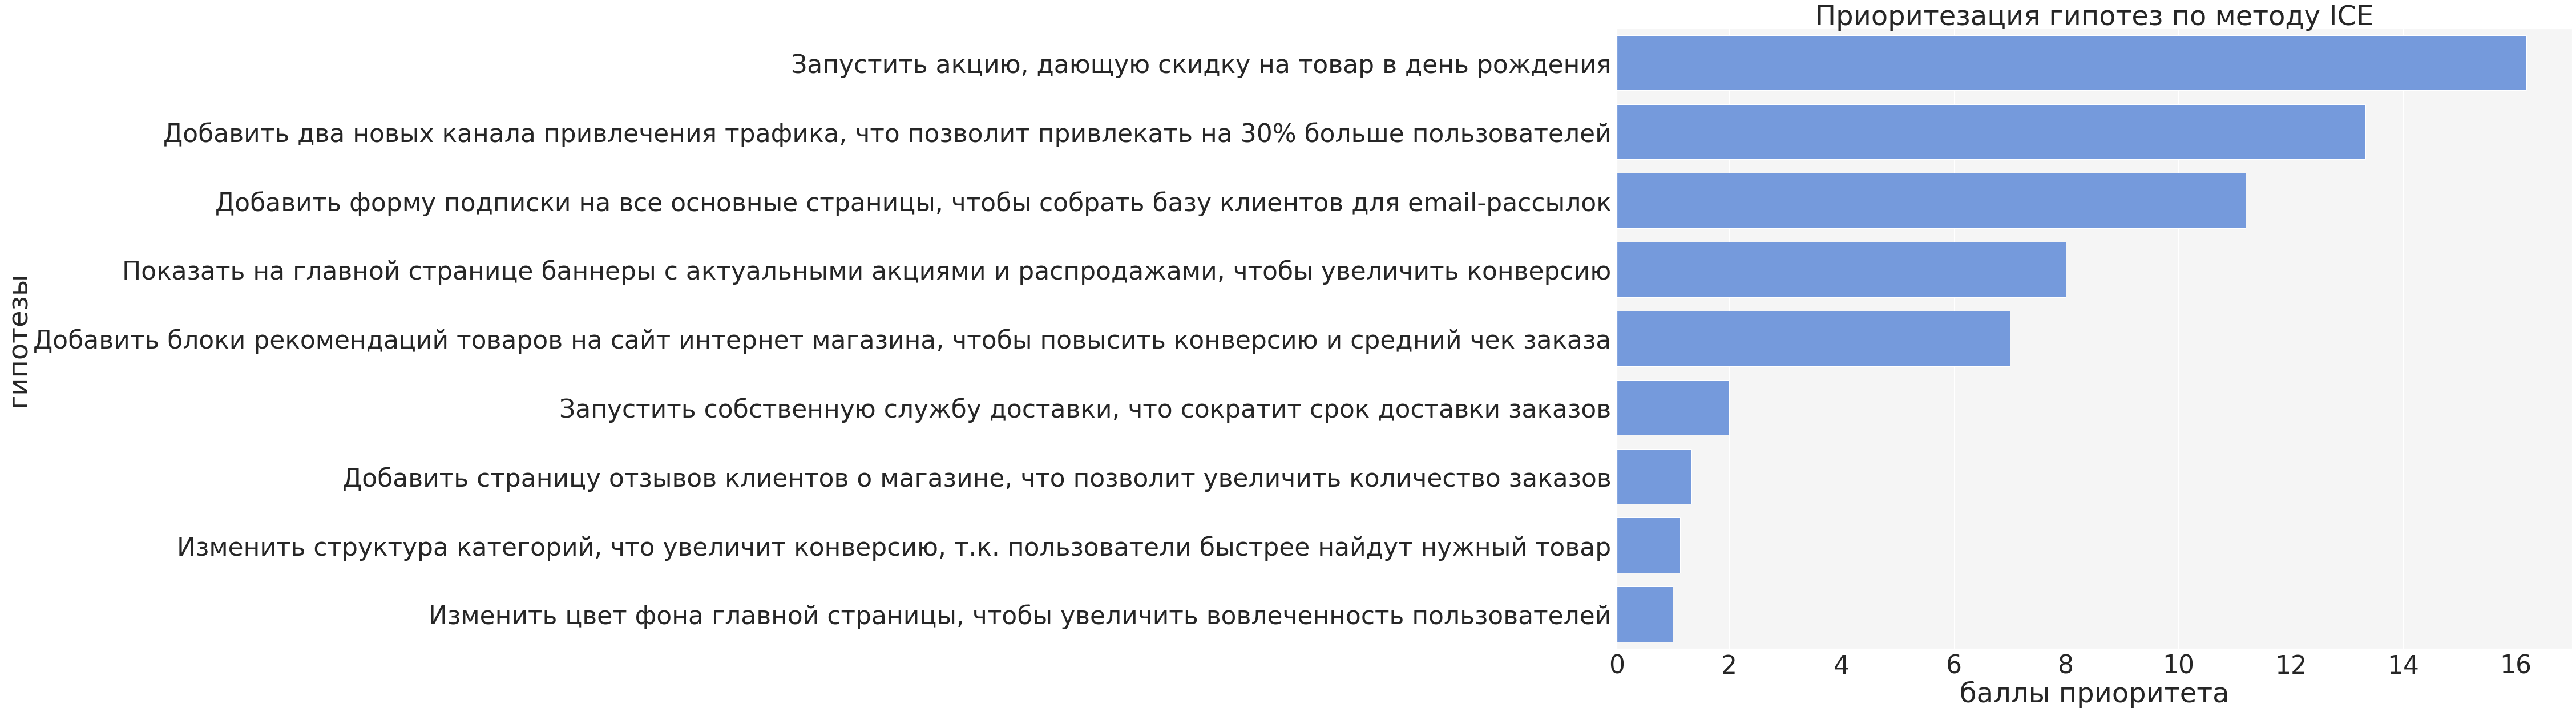

In [18]:

sns.barplot(
        data=hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False), 
        x='ice', y='hypothesis', color='#6495ED').set(xlabel='баллы приоритета', ylabel='гипотезы', title='Приоритезация гипотез по методу ICE')

[Text(0.5, 0, 'баллы приоритета'),
 Text(0, 0.5, 'гипотезы'),
 Text(0.5, 1.0, 'Приоритезация гипотез по методу RICE')]

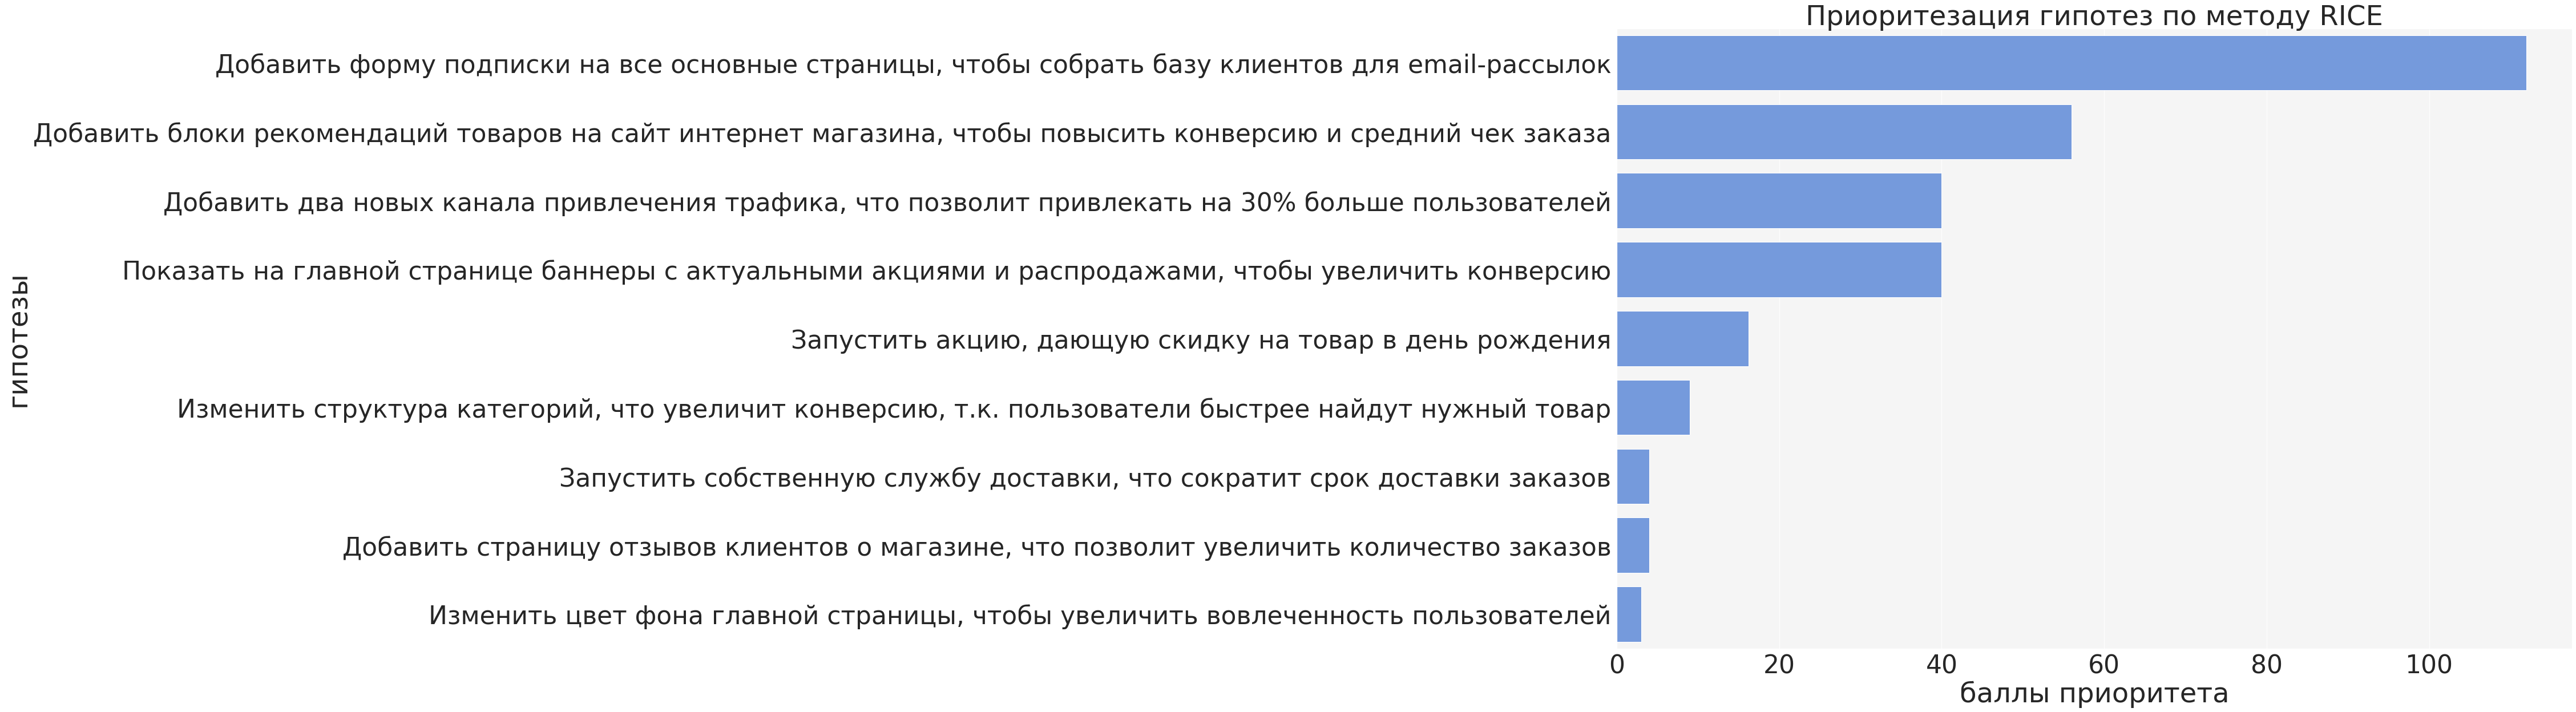

In [19]:
sns.barplot(
        data=hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False), 
        x='rice', y='hypothesis', color='#6495ED').set(xlabel='баллы приоритета', ylabel='гипотезы', title='Приоритезация гипотез по методу RICE')

__Вывод__

В топе приоритетных задач находятся одни и те же гипотезы, но в разном порядке. Отличие возникает из за того, что в фреймворк RICE добавляем переменную отвечающую за количество пользователей, которых затронет изменение.

## Часть 2. Анализ A/B-теста

__Задача__


Проанализируйте A/B-тест:
    
* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

* Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

* Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Чтобы построить графики, нужно собрать кумулятивные данные.

In [20]:
date_group = orders[['date', 'group']].drop_duplicates()

In [21]:
orders_aggr = (
               date_group
               .apply(
                   lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                   orders['group'] == x['group'])]
                   .agg(
                       {'date': 'max',
                        'group': 'max',
                        'transaction_id': 'nunique',
                        'visitor_id': 'nunique',
                        'revenue': 'sum'}),
                   axis=1,)
                   .sort_values(by=['date', 'group'])
              )         

In [22]:
visitors_aggr = (
                 date_group
                 .apply(
                     lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                       visitors['group'] == x['group'])]
                     .agg(
                         {'date': 'max', 
                          'group': 'max', 
                          'visitors': 'sum'}),
                     axis=1,)
                     .sort_values(by=['date', 'group'])
                )

In [23]:
cumulative_data = (
                   orders_aggr
                   .merge(
                          visitors_aggr, 
                          left_on=['date', 'group'], 
                          right_on=['date', 'group'])
                  )    

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [24]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']


In [25]:
cumulative_data.head(6)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
5,2019-08-03,B,61,59,380996,1803,0.033833


<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
Можно проверить, корректно ли был содан датафрейм cumulative_data. Например, совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных. </div>   

__Графики__

__Постройте график кумулятивной выручки по группам.__

In [26]:
sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(15,10)})

[Text(0.5, 0, 'дата'),
 Text(0, 0.5, 'Выручка, млн.'),
 Text(0.5, 1.0, 'Динамика кумулятивной выручки по группам А и В')]

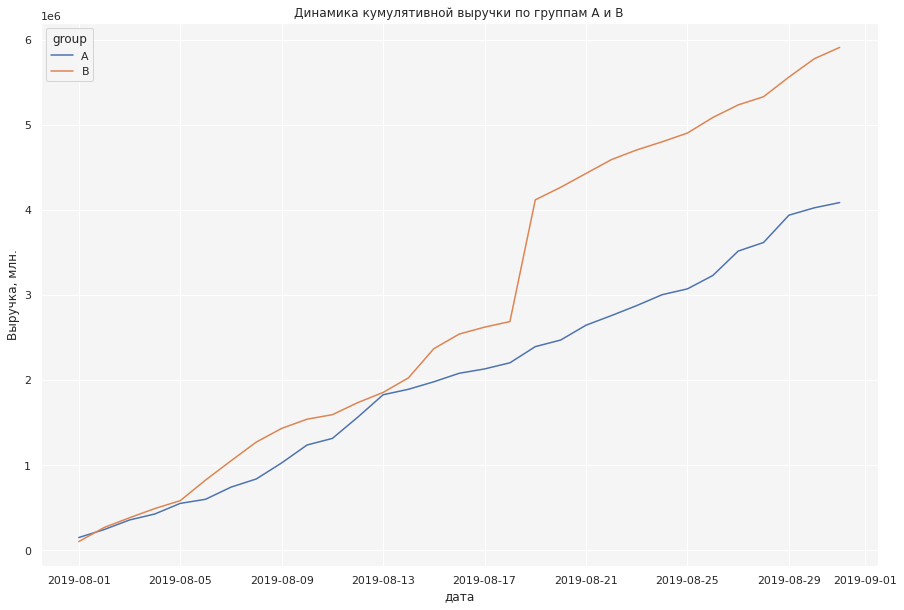

In [27]:
(
sns.lineplot(
    data=cumulative_data, 
    x='date', y='revenue', 
    hue='group')
.set(xlabel='дата', 
     ylabel='Выручка, млн.', 
     title='Динамика кумулятивной выручки по группам А и В')
)    

* __Вывод__

Кумулятивная выручка группы А растет достаточно стабильно, без ярких всплесков или падений. У группы В можно отметить резкий рост 18.08.2019. Причиной этого аномального скачка, может быть либо сверх большой поток заказов, либо заказы на большую сумму. Выясним это дальше в ходе исследования.

__Постройте график кумулятивного среднего чека по группам.__ 

In [28]:
cumulative_data['average_bill'] = cumulative_data['revenue']/cumulative_data['orders']

[Text(0.5, 0, 'Дата'),
 Text(0, 0.5, 'Сумма'),
 Text(0.5, 1.0, 'Динамика кумулятивного среднего чека по группам А и В')]

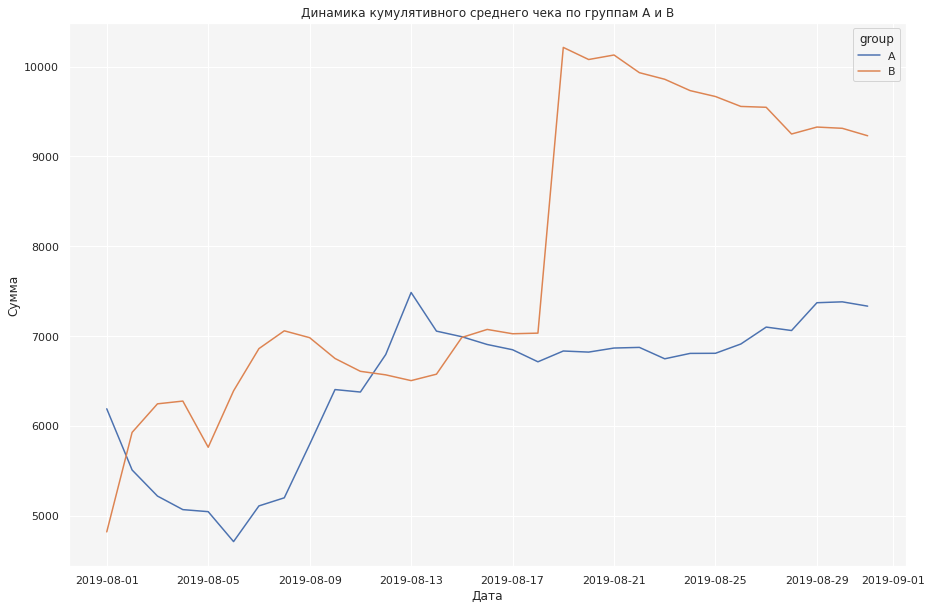

In [29]:
(
sns.lineplot(
    data=cumulative_data, 
    x='date', y='average_bill', 
    hue='group')
.set(xlabel='Дата', 
     ylabel='Сумма', 
     title='Динамика кумулятивного среднего чека по группам А и В')
)    

* __Вывод__

В группе А средний чек за рассматриваемый период рос, но стабилизировался. В группе B заметен сильный скачок, который может говорить о сделанных больших покупках в группе B.

__Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.__

In [30]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

In [31]:
cumulative_revenue_ab = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
)


cumulative_revenue_ab['relative_change'] = (
                                           (cumulative_revenue_ab['revenue_b']/cumulative_revenue_ab['orders_b'])/
                                           (cumulative_revenue_ab['revenue_a']/cumulative_revenue_ab['orders_a'])-1
                                           ) 

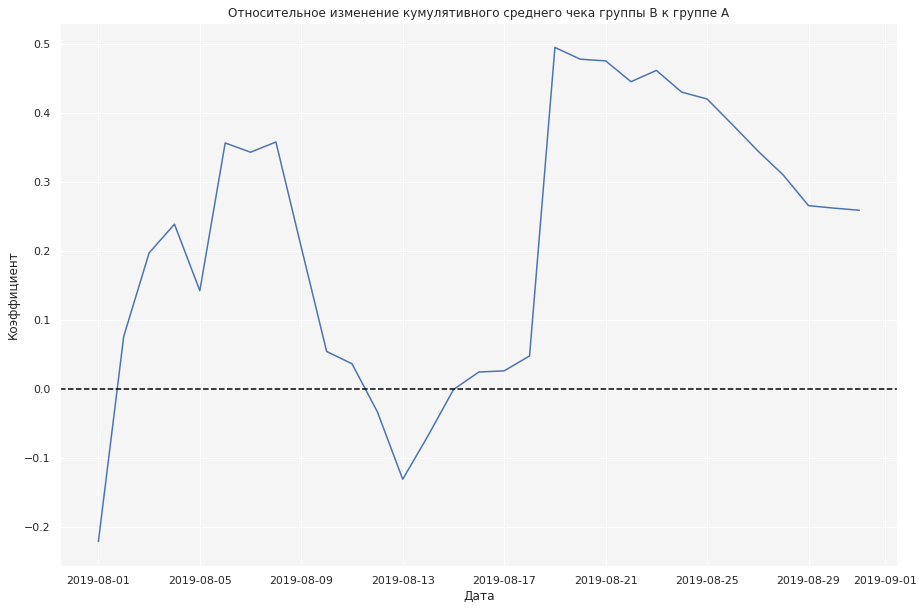

In [32]:
(
    sns.lineplot(data=cumulative_revenue_ab, 
                 y='relative_change', x='date')
    .set(xlabel='Дата', 
         ylabel='Коэффициент', 
         title='Относительное изменение кумулятивного среднего чека группы B к группе A')
)    
plt.axhline(y=0, color='black', linestyle='--')

__Вывод__

Видны сильные колебания на графике, которые могут говорить о выбросах

__Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.__

Для начала построим график кумулятивной конверсии

In [33]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

[Text(0.5, 0, 'Дата'),
 Text(0, 0.5, 'Конверсия'),
 Text(0.5, 1.0, 'Кумулятивная конверсия по группам А и В')]

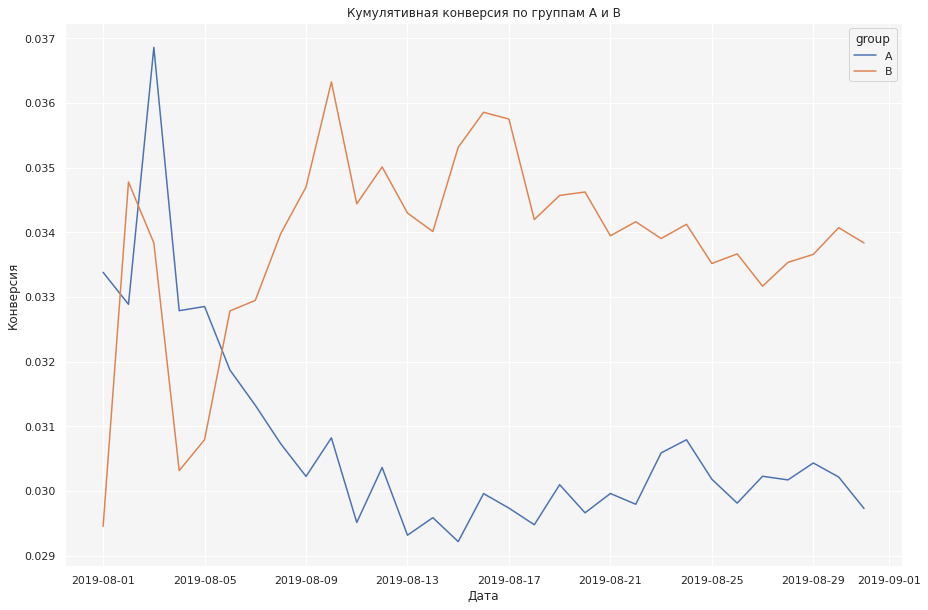

In [34]:
(
sns.lineplot(
    data=cumulative_data, 
    x='date', y='conversion', 
    hue='group')
.set(xlabel='Дата', 
     ylabel='Конверсия', 
     title='Кумулятивная конверсия по группам А и В')
)    

__Вывод__

На графике видно, что в начале периода конверсия сильно колебалась, но благодаря тому, что исследуются кумулятивные значения, конверсия стабилизировалась.

Относительное изменение кумулятивной конверсии группы B к группе A

In [35]:
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

In [36]:
cumulative_conversions_ab = (
    cumulative_data_a[['date','conversion']]
    .merge(
        cumulative_data_b[['date','conversion']], 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['_a', '_b']
    )
)

In [37]:
cumulative_conversions_ab['relative_change'] = (
                                                 cumulative_conversions_ab['conversion_b']/
                                                 cumulative_conversions_ab['conversion_a']-1
                                               )   

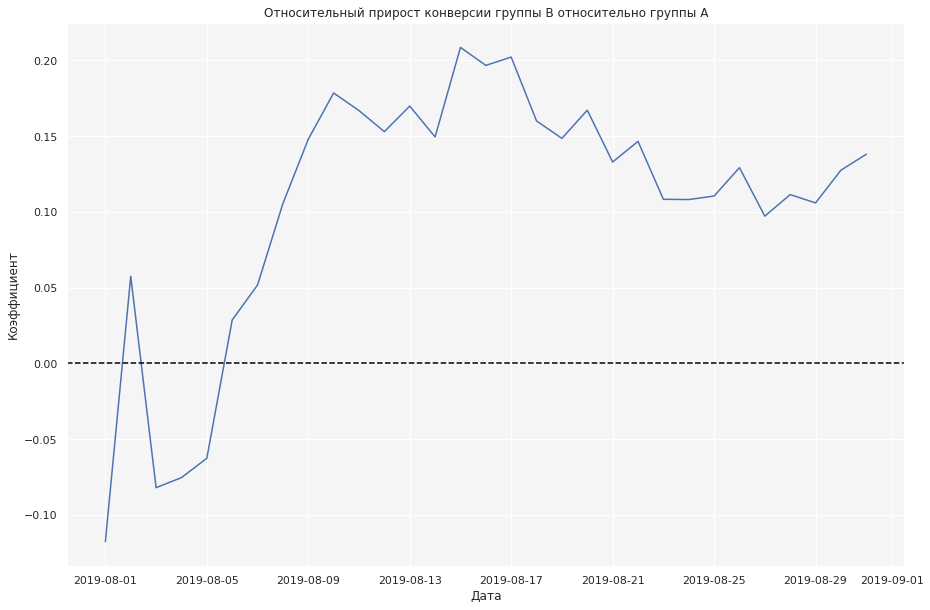

In [38]:
(
    sns.lineplot(data=cumulative_conversions_ab, 
                 y='relative_change', x='date')
    .set(xlabel='Дата', 
         ylabel='Коэффициент', 
         title='Относительный прирост конверсии группы B относительно группы A')
)    
plt.axhline(y=0, color='black', linestyle='--')

* __Вывод__

В начале периода проведения теста конверсия группы А была значительно выше, но конверсия в группе В значительно выросла.

__Постройте точечный график количества заказов по пользователям.__

Для начала посмотрим гистограмму распределения количества заказов по пользователям

In [39]:
orders_count = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

In [40]:
orders_count.columns = ['visitor_id', 'orders']

[Text(0.5, 1.0, 'Распределение количества заказов по пользователям'),
 Text(0.5, 0, 'Количество заказов'),
 Text(0, 0.5, 'Количество пользователей')]

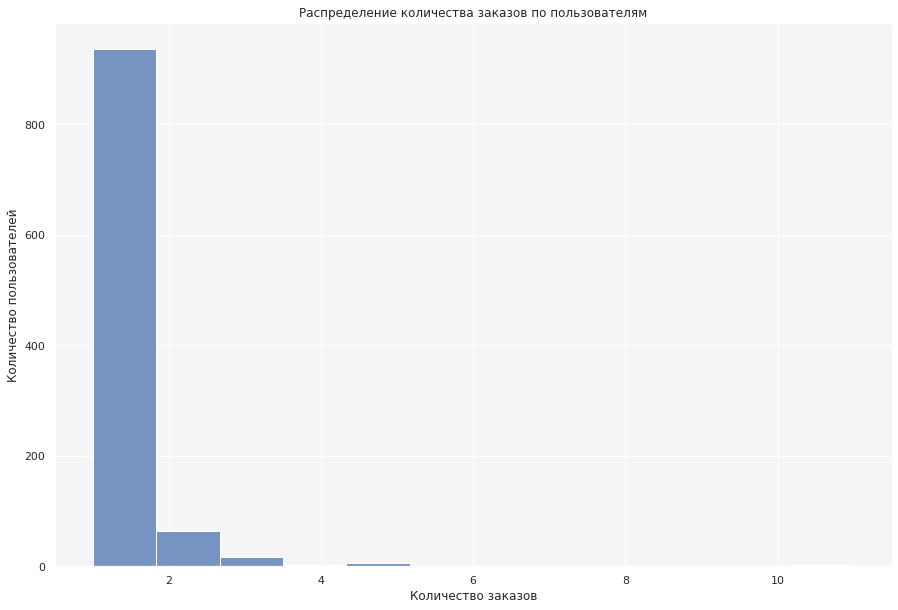

In [41]:
(
sns.histplot(data=orders_count['orders'])
.set(title='Распределение количества заказов по пользователям', 
     xlabel='Количество заказов', 
     ylabel='Количество пользователей')    
)    

[Text(0.5, 0, 'Пользователи'),
 Text(0, 0.5, 'Количество заказов'),
 Text(0.5, 1.0, 'Распределение количества заказов по пользователям')]

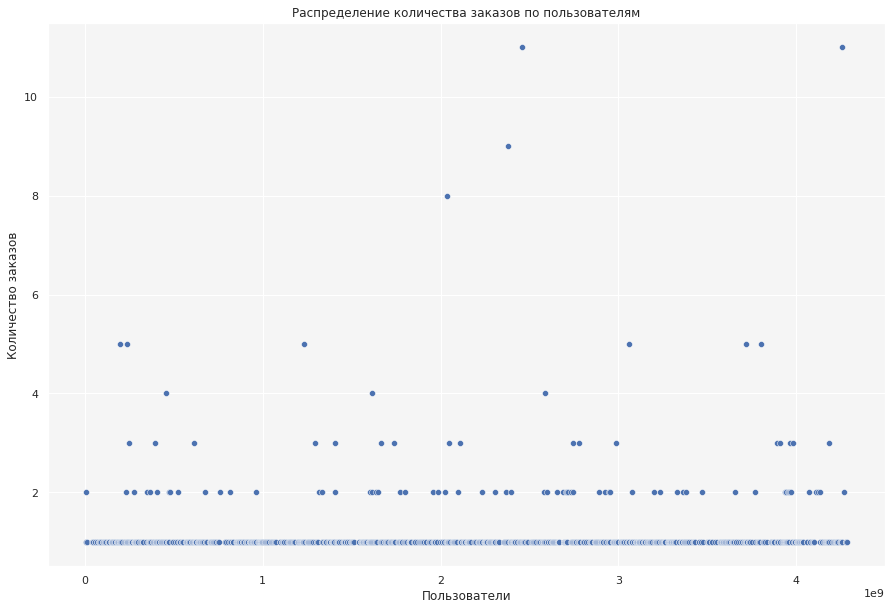

In [42]:
(
sns.scatterplot(data=orders_count, 
                x='visitor_id', 
                y='orders')
.set(
     xlabel='Пользователи',
     ylabel='Количество заказов',
     title='Распределение количества заказов по пользователям')
)    

* __Вывод__

Видно что большиноство пользователей соврешило по одному заказу, пользователей совершивших два заказа тоже относительно много.


__Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.__

In [43]:
np.percentile(orders_count['orders'], [95, 99])

array([2., 4.])

* __Вывод__

Всего 5% пользователей совершили больше двух покупок, 4 покупки совершил всего 1% пользователей. Определим границу по величине в 95%

__Постройте точечный график стоимостей заказов.__

[Text(0.5, 1.0, 'Распределение стоимости заказов по пользователям'),
 Text(0.5, 0, 'Стоимость заказов'),
 Text(0, 0.5, 'Количество пользователей')]

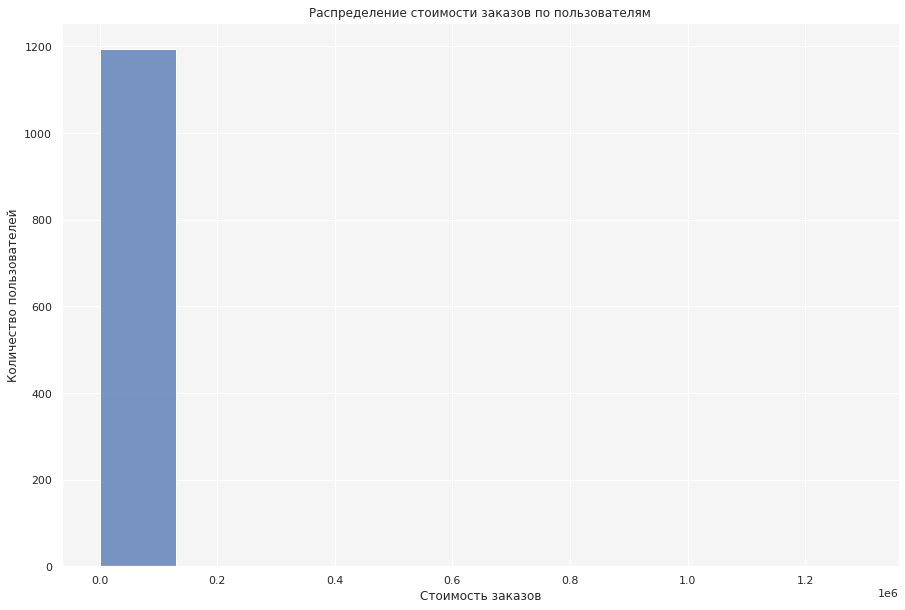

In [44]:
(
sns.histplot(data=orders['revenue'], 
             bins=10)
.set(title='Распределение стоимости заказов по пользователям', 
     xlabel='Стоимость заказов', 
     ylabel='Количество пользователей')    
)    

[Text(0.5, 0, 'Пользователи'),
 Text(0, 0.5, 'Количество заказов'),
 Text(0.5, 1.0, 'Распределение стоимости заказов по пользователям')]

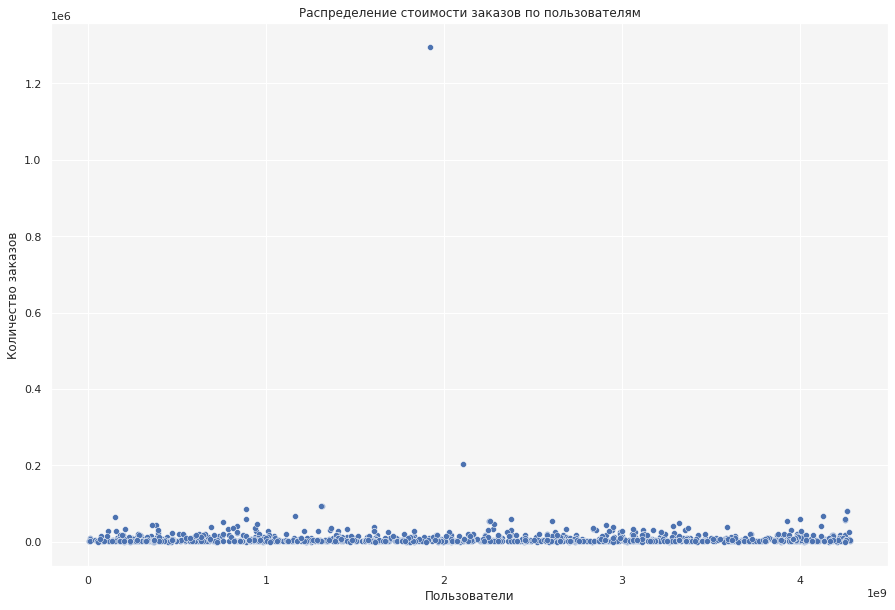

In [45]:
(
sns.scatterplot(data=orders, 
                x='visitor_id', 
                y='revenue')
.set(
     xlabel='Пользователи',
     ylabel='Количество заказов',
     title='Распределение стоимости заказов по пользователям')
)    

* __Вывод__

Виден серьезный выброс, который оказывает влияние на метрики

__Посчитайте 95-й и 99-й перцентили стоимости заказов.__

In [46]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

* __Вывод__

Определяем границу по величине в 95%

__Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.__

Подготовим данные

In [47]:
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']


data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

H0: Различий в конверсии между группами нет

H1: Различия в конверсии между группами есть
    
Уровень значимости = 0.05  

Для проверки гипотез, применим критери Манна-Уитни

In [48]:
alpha = 0.05

In [49]:
ordersByUsersA = ( 
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id' : pd.Series.nunique})
)

ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False).
    agg({'transaction_id' : pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [50]:
sampleA = (
    pd.concat([ordersByUsersA['orders'],
               pd.Series(0, index=np.arange(visitors[visitors.group == 'A']['visitors'].sum() - 
                                            len(ordersByUsersA['orders'])), name='orders')],axis=0)
)

sampleB = (
    pd.concat([ordersByUsersB['orders'],
               pd.Series(0, index=np.arange(visitors[visitors.group == 'B']['visitors'].sum() 
                                            - len(ordersByUsersB['orders'])), name='orders')],axis=0) 
)

In [51]:
p_value1 = stats.mannwhitneyu(sampleA, sampleB)[1]

In [52]:
if (p_value1 < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
print('p-значение', p_value1)
print("Относительный прирост В к А: {0:.3%}".format(sampleB.mean() / sampleA.mean()-1))

Отвергаем нулевую гипотезу: между группами есть разница
p-значение 0.016792355056752608
Относительный прирост В к А: 13.808%


__Вывод__

В результате теста на сырых данных, нулевая гипотеза о том что между группами нет разницы отвергнута. А значит, что на основе проведенного тесте можно говорить, о том что есть разница в конверсии.
Относительный прирост группы В равен 13,8%.

__Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.__

H0: Различий в среднем чеке между группами нет

H1: Различия в среднем чеке между группами есть

Уровень значимости = 0.05

Для проверки гипотез, применим критери Манна-Уитни

In [53]:
p_value2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

In [54]:
if (p_value2 < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
print('p-значение', p_value2)        
print("Относительный прирост В к А: {0:.3%}".format(orders[orders['group']=='B']['revenue'].mean()/ orders[orders['group']=='A']['revenue'].mean()-1))

Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
p-значение 0.7292909855432458
Относительный прирост В к А: 25.871%


__Вывод__

В результате теста на сырых данных, нулевая гипотеза не может быть отвергнута, а значит можно говорить о том, что различий в среднем чеке между группами нет. Относительный прирост группы В равен 25,8%.

__Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.__

H0: Различий в конверсии между группами нет

H1: Различия в конверсии между группами есть
    
Уровень значимости = 0.05  

Для проверки гипотез, применим критери Манна-Уитни

In [56]:
usersWithManyOrders = (
    pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'], 
               ordersByUsersB[ordersByUsersB['orders']> 2]['visitor_id']], axis = 0)
)

In [57]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']

In [58]:
abnormal_users = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [59]:
display(abnormal_users.head(5))
abnormal_users.shape[0]

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64

74

Определили 74 аномальных пользователей.

In [60]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFfiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [61]:
p_value3 = stats.mannwhitneyu(sampleAFiltered, sampleBFfiltered)[1]

In [62]:
if (p_value3 < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
print('p-значение', p_value2)        
print("Относительный прирост В к А: {0:.3%}".format(sampleBFfiltered.mean()/sampleAFiltered.mean()-1))

Отвергаем нулевую гипотезу: между группами есть разница
p-значение 0.7292909855432458
Относительный прирост В к А: 17.270%


* __Вывод__

На отфильтрованных данных разница в конверсии между группами есть, а относительный прирост конверсии группы В отнистельно группы А увеличился на 17.2%.

__Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.__

H0: Различий в среднем чеке между группами нет

H1: Различия в среднем чеке между группами есть

Уровень значимости = 0.05

Для проверки гипотез, применим критери Манна-Уитни

In [63]:
p_value4 =(
    stats
    .mannwhitneyu(orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'], 
                    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'])[1]
)

In [64]:
diff =(
    orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'].mean()/
    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'].mean()-1
)


In [65]:
if (p_value4 < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
print('p-значение', p_value2)        
print("Относительный прирост В к А: {0:.3%}".format(diff))

Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
p-значение 0.7292909855432458
Относительный прирост В к А: 2.002%


* __Вывод__

На основе проведённого теста, различий в среднем чеке мужду группами нет

## Выводы


Исследование проводилось в 2 этапа.


1-й этап - приоритизация гипотез.
Выводом этого этапа станет рекомандация интернет-магазину о необходимости обратить внимание на следующие гипотезы: 


* Запустить акцию, дающую скидку на товар в день рождения
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

2-й этап - проведение А/В теста.
Результаты А/В теста:


* Есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий. 

* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

* График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А

* На основании вышеизложенного рекомендуем остановить тест, зафиксировав победу группы B (ее конверсия значительно выше конверсии группы А).